In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 73.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 79.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 55.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/8

In [2]:
!pip install keras

In [6]:
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')


# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.16.1
Keras Version 3.3.2


In [7]:
import pandas as pd

# Load the dataset
wine_quality_data = pd.read_csv("wine.csv")

In [8]:
# Display the dimensions of the dataset
print("Dimensions of the Wine Quality dataset:")
print("Number of rows:", wine_quality_data.shape[0])
print("Number of columns:", wine_quality_data.shape[1])

Dimensions of the Wine Quality dataset:
Number of rows: 1599
Number of columns: 12


In [12]:
# 1. Check for null values
null_values = wine_quality_data.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# 2. Identify categorical variables
categorical_variables = wine_quality_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables in the dataset:")
print(categorical_variables)

Categorical variables in the dataset:
['quality']


In [11]:
# 3. Encode categorical variables
wine_quality_data_encoded = pd.get_dummies(wine_quality_data, columns=categorical_variables, drop_first=True)
print("Encoded dataset:")
print(wine_quality_data_encoded.head())

Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality_good  
0      9.4             0  
1      9.8     

In [19]:
# Separate features and target variable
features = wine_quality_data_encoded.drop(columns=['quality_good'])
target = wine_quality_data_encoded['quality_good']

print("Features:")
print(features.head())

print("\nTarget Variable:")
print(target.head())

Features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4 

In [20]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split training data into training and validation sets (60% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (959, 11)
Validation set shape: (320, 11)
Test set shape: (320, 11)


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test sets using the scaler fitted on the training set
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#define the no of features:
input_dim = X_train_scaled.shape[1]


#intialize the model:

model = Sequential()


model.add(Dense(64,input_dim=input_dim,activation= 'relu')) #first hidden layer
model.add(Dense(32,activation='relu')) #Second hidden layer

#Add Output Layer:
model.add(Dense(1,activation='sigmoid')) #output layer

In [29]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint callback
checkpoint_path = "model_checkpoint.keras"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

In [41]:
# Fit the model to the data
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5556 - loss: 0.6896 - val_accuracy: 0.7250 - val_loss: 0.6135
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7477 - loss: 0.5601 - val_accuracy: 0.7437 - val_loss: 0.5572
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7114 - loss: 0.5496 - val_accuracy: 0.7500 - val_loss: 0.5403
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7611 - loss: 0.5039 - val_accuracy: 0.7625 - val_loss: 0.5344
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 0.4888 - val_accuracy: 0.7656 - val_loss: 0.5296
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7507 - loss: 0.5069 - val_accuracy: 0.7656 - val_loss: 0.5288
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7615 - loss: 0.4953 - val_accuracy: 0.7656 - val_loss: 0.5259
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7847 - loss: 0.4643 - val_accuracy: 0.7688 - val_loss

In [42]:
# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [47]:
import pandas as pd

# Store training history as DataFrame
history_df = pd.DataFrame(history.history)
#print training history
print(history_df)

   accuracy      loss  val_accuracy  val_loss
0  0.606882  0.659750      0.725000  0.613532
1  0.720542  0.564899      0.743750  0.557227
2  0.735141  0.523045      0.750000  0.540348
3  0.748697  0.506918      0.762500  0.534408
4  0.749739  0.497862      0.765625  0.529600
5  0.758081  0.490315      0.765625  0.528803
6  0.768509  0.484140      0.765625  0.525932
7  0.765381  0.479066      0.768750  0.528714
8  0.776851  0.474998      0.775000  0.526478
9  0.777894  0.470529      0.771875  0.526475


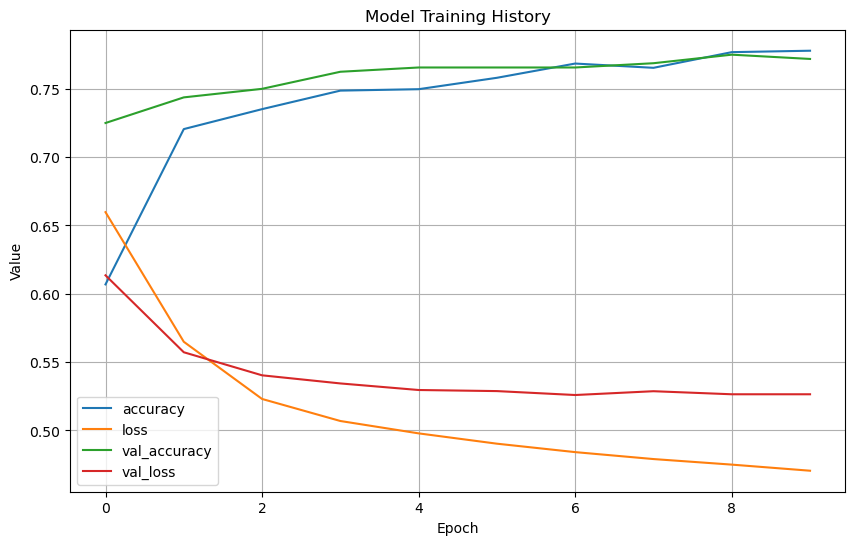

In [44]:
import matplotlib.pyplot as plt

# Plot training history
history_df.plot(figsize=(10, 6))
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [45]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7108 - loss: 0.5075 
Test Loss: 0.5111628770828247
Test Accuracy: 0.7250000238418579
